 # <font color="#22a176">  Estatística - Probabilidade e Amostragem: Desafio Final



In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import binom

#visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('populacao_brasileira.csv.csv')
df.head(10)

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M
5,5,AM,38,Fundamental,Avançado,4441.57,F
6,6,DF,56,Médio,Intermediário,528.36,F
7,7,DF,36,Superior,Avançado,2203.10,F
8,8,PI,40,Fundamental,Básico,3577.07,F
9,9,AP,28,Superior,Avançado,2796.95,M


In [ ]:
df.dtypes

Unnamed: 0                           int64
estado                              object
idade                                int64
escolaridade                        object
nível de proficiência em inglês     object
renda                              float64
sexo                                object
dtype: object

# Exercício 1
 Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.



In [ ]:
# Quantas pessoas tem na amostra
tp = df['Unnamed: 0'].count()

# Quantas pessoas da amostra tem o inglês avançado
fe = df[df['nível de proficiência em inglês'] == 'Avançado']['Unnamed: 0'].count()

# Calculando a probabilidade da pessoa ser fluente em inglês
pfe = fe / tp

# Calculando a probabilidade complementar
CO = 1 - pfe

print('A probabilidade de escolhermos uma pessoa aleatória e ela não ser \nfluente em inglês é de:', CO)

A probabilidade de escolhermos uma pessoa aleatória e ela não ser 
fluente em inglês é de: 0.656


# Exercício 2

Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?


In [ ]:
# Selecionando pessoas de Alagoas e do Pará
TP_Para_Alagoas = df[df['estado'] == 'AL']['Unnamed: 0'].count() + df[df['estado'] == 'PA']['Unnamed: 0'].count()

# Procurando pessoas com renda superiores a cinco mil reais
pa5 = df[(df['estado'] == 'AL') | (df['estado'] == 'PA')]['Unnamed: 0'][df['renda'] > 5000].count()

# Calculando a probabilidade
PF = pa5 / TP_Para_Alagoas

print('A probabilidade de uma pessoa de Alagoas ou Pará, aleatoriamente \nescolhida, ter uma renda superior a R$5000 é de', PF)


A probabilidade de uma pessoa de Alagoas ou Pará, aleatoriamente 
escolhida, ter uma renda superior a R$5000 é de 0.05063291139240506


# Exercício 3

Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

In [ ]:
# Quantas pessoas da amostra são do Amazonas
P_amazonas = df[df['estado'] == 'AM']['Unnamed: 0'].count()

# Quantas pessoas do Amazonas tem ensino superior ou pós graduação
P_Amazonas_Ensino = df[df['estado'] == 'AM']['Unnamed: 0'][(df['escolaridade'] == 'Superior') | (df['escolaridade'] == 'Pós-graduação')].count()

# Calculando probabilidade efetiva
P_efetiva = P_Amazonas_Ensino / P_amazonas

# Calculando probabilidade complementar
P_complementar = 1 - (P_Amazonas_Ensino / P_amazonas)

# Probabilidade da quinta pessoa que conversar tenha ensino superior
P_quinto = P_complementar * P_complementar * P_complementar * P_complementar * P_efetiva

print('A probabilidade de uma pessoa ter ensino superior \ncompleto no estado do Amazonas é de:', P_efetiva)
print('\nA probabilidade da quinta pessoa conversar, que é amazonense, \nter ensino superior completo é de:', P_quinto)

A probabilidade de uma pessoa ter ensino superior 
completo no estado do Amazonas é de: 0.5526315789473685

A probabilidade da quinta pessoa conversar, que é amazonense, 
ter ensino superior completo é de: 0.022135890467222828


# Exercício 4

Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

In [ ]:
# definindo as faixas de renda
faixas_renda = [0, 1500, 3000, 4500, 6000]

# Criando uma nova coluna com as categorias
df['faixa_renda'] = pd.cut(df['renda'], bins = faixas_renda)

# fazendo a contagem de pessoas por faixa
contagem = df['faixa_renda'].value_counts().sort_index()

# calculo do histograma da densidade da renda
hist, bins = np.histogram(df['renda'], bins = faixas_renda, density = True)

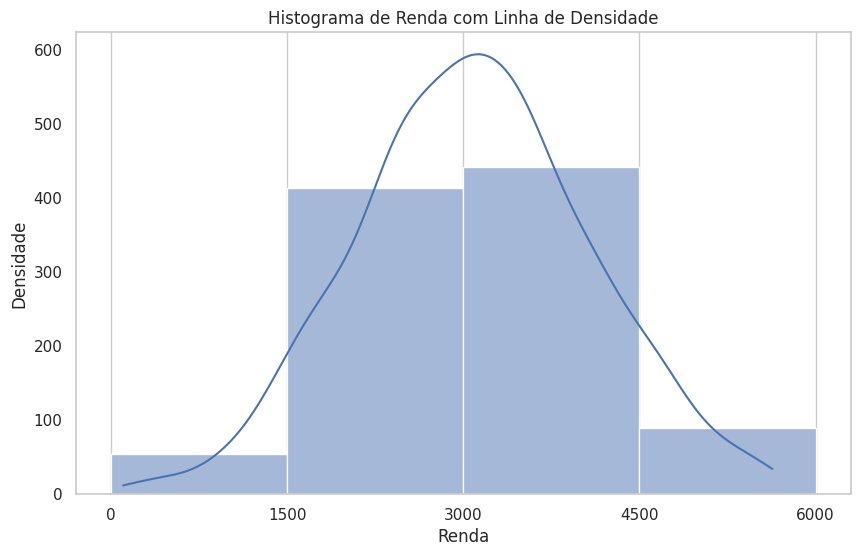

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='renda', bins=faixas_renda, kde=True)
plt.xlabel('Renda')
plt.ylabel('Densidade')
plt.title('Histograma de Renda com Linha de Densidade')
plt.xticks(faixas_renda)
plt.grid(axis='y')
plt.show()

Podemos dizer que a renda de uma pessoa brasileira está na sua maioria na faixa de 3000 reais a 4500 reais, e a renda está com o pico em 3000 reais.

# Exercício 5

Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.

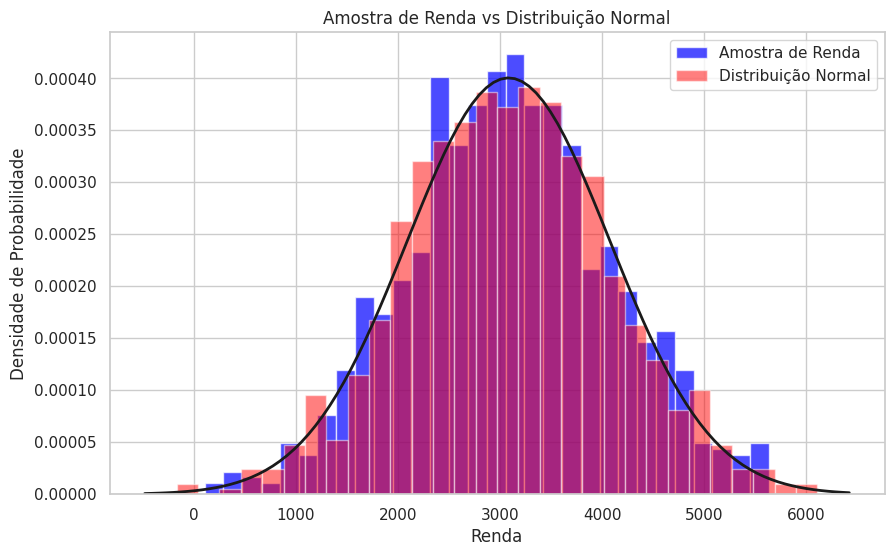


Média da renda da amostra: 3082.54
Variância da renda da amostra: 992163.07


In [ ]:
renda_amostra = df['renda']

# Calculo da renda média
media_renda = np.mean(renda_amostra)

# Calculo da variância da renda
variancia_renda = np.var(renda_amostra)

desvio_padrao_renda = np.sqrt(variancia_renda)
amostra_normal_renda = np.random.normal(loc=media_renda, scale=desvio_padrao_renda, size=len(renda_amostra))

# Criar o histograma da amostra de renda e a distribuição normal
plt.figure(figsize=(10, 6))
plt.hist(renda_amostra, bins=30, density=True, alpha=0.7, color='blue', label='Amostra de Renda')  # Histograma
plt.hist(amostra_normal_renda, bins=30, density=True, alpha=0.5, color='red', label='Distribuição Normal')  # Distribuição normal

# Adicionar linha representando a distribuição normal teórica
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = ((1 / (desvio_padrao_renda * np.sqrt(2 * np.pi))) * np.exp(-(x - media_renda)**2 / (2 * desvio_padrao_renda**2)))
plt.plot(x, p, 'k', linewidth=2)

# Adicionar rótulos e título
plt.xlabel('Renda')
plt.ylabel('Densidade de Probabilidade')
plt.title('Amostra de Renda vs Distribuição Normal')
plt.legend()

# Exibir o gráfico
plt.show()

# Exibir média e variância calculadas
print("\nMédia da renda da amostra:", media_renda.round(2))
print("Variância da renda da amostra:", variancia_renda.round(2))

# Exercício 6

Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [ ]:
# Total da população
ppt = df['Unnamed: 0'].count()

# Total de pessoas que tem pós graduação
ppt_pos_graduacao = df[df['escolaridade'] == 'Pós-graduação']['Unnamed: 0'].count()

# Probabilidade de selecionar uma pessoa com pós graduação
prob_pos_graduacao = ppt_pos_graduacao / ppt


# Nova amostra de um milhão de pessoas:
amostra_milhao = 1000000

# Sucesso desejado
sucesso = 243000

# Calculando a probabilidade de encontrarmos 243 mil pessoas com pós-graduação
probabilidade_milhao = binom.pmf(sucesso, amostra_milhao, prob_pos_graduacao)

print('Considerando a amostra a probabilidade de encontrarmos 243 mil \npessoas com pós-graduação é de:', probabilidade_milhao)
prob_pos_graduacao

Considerando a amostra a probabilidade de encontrarmos 243 mil 
pessoas com pós-graduação é de: 1.1104854289794913e-119


0.253

# Exercício 7

Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.



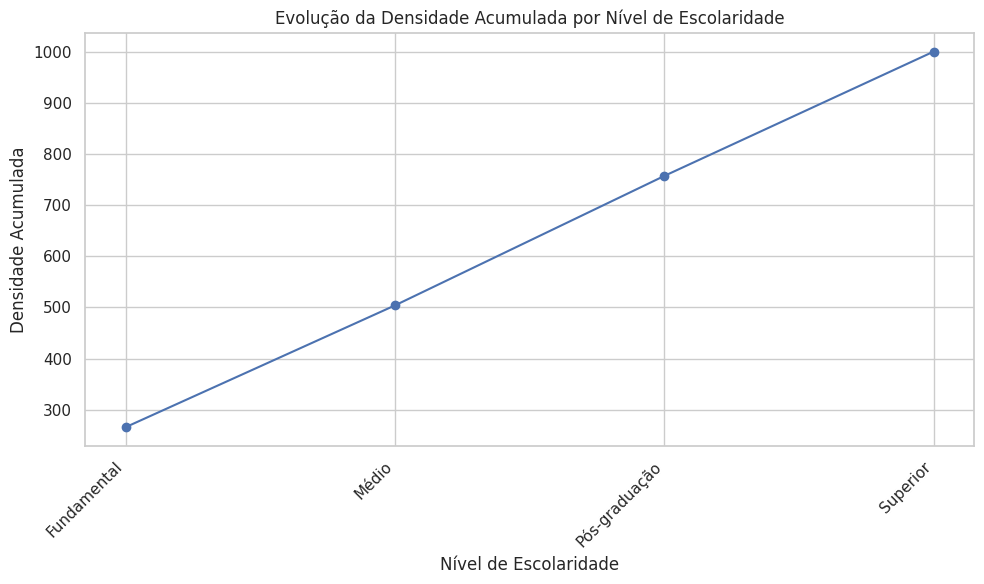


Densidade de escolaridade
Fundamental      266
Médio            238
Pós-graduação    253
Superior         243
Name: Unnamed: 0, dtype: int64

Densidade Acumulada de: escolaridade
Fundamental       266
Médio             504
Pós-graduação     757
Superior         1000
Name: Unnamed: 0, dtype: int64


In [ ]:
densidade_escolar = df.groupby('escolaridade')['Unnamed: 0'].count()

# Calculando a função de densidade acumulada discreta
densidade_acumulada = densidade_escolar.cumsum()

# Criando o gráfico da evolução da densidade acumulada
plt.figure(figsize=(10, 6))
plt.plot(densidade_acumulada.index, densidade_acumulada.values, marker='o', linestyle='-')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Densidade Acumulada')
plt.title('Evolução da Densidade Acumulada por Nível de Escolaridade')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhor visualização
plt.grid(True)
plt.tight_layout()  # Ajustar layout para evitar sobreposição de elementos
plt.show()

print('\nDensidade de', densidade_escolar)
print("\nDensidade Acumulada de:", densidade_acumulada)

# Exercício 8

Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?



In [ ]:
# Conferindo quantas pessoas tem o nível de inglês intermediario
p_intermediario = df[df['nível de proficiência em inglês'] == 'Intermediário']['Unnamed: 0'].count()

pessoas_amostra = 1000

# Probabilidade de uma pessoa com inglês intermediário
prob_intermediario = p_intermediario / pessoas_amostra

# Proporção complementar
p_complementar = 1 - prob_intermediario

# Valor crítico para 95% de confiança
Z = 1.96

# Calculando a margem de erro
margem_erro = Z * np.sqrt((prob_intermediario * p_complementar) / pessoas_amostra)
print('A margem de erro amostral da proporção populacional considerando a proporção \nde pessoas com nível de inglês intermediário é de', margem_erro)

A margem de erro amostral da proporção populacional considerando a proporção 
de pessoas com nível de inglês intermediário é de 0.029121603225097343


329

# Exercício 9

Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

In [ ]:
# Renda média da população com acréscimo de 1000 reais
df_renda = df['renda'].mean() + 1000

# Número total de pessoas na amostra
df_pessoas = 1000
# Calculando quantas pessoas na amostra tem uma renda maior que df_renda
df_maior = df[df['renda'] > df_renda]['Unnamed: 0'].count()

# Probabilidade de selecionar uma pessoa com essa renda
p_um = df_maior / df_pessoas

sucesso = 60

# Calculando qual a probabilidade de encontrar 60 pessoas com a renda calculada
prob = binom.pmf(sucesso, df_pessoas, p_um)

print('A probabilidade de encontrar 60 pessoas com uma renda de R$', df_renda.round(2), 'é de:', prob)

A probabilidade de encontrar 60 pessoas com uma renda de R$ 4082.54 é de: 1.099520565163774e-22


# Exercício 10

Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?

In [ ]:
# Calculando a probabilidade de escolher alguém do sudeste
TP_Sudeste = df[df['estado'] == 'RJ']['Unnamed: 0'].count() + df[df['estado'] == 'SP']['Unnamed: 0'].count() + df[df['estado'] == 'MG']['Unnamed: 0'].count() + df[df['estado'] == 'ES']['Unnamed: 0'].count()
P_Sudeste = TP_Sudeste / 1000

# Calculando a probabilidade de escolher um homem
TP_masc = df[df['sexo'] == 'M']['Unnamed: 0'].count()
P_masc = TP_masc / 1000

# Calculando a probabilidade de escolher alguém do fundamental
TP_escolaridade = df[df['escolaridade'] == 'Fundamental']['Unnamed: 0'].count()
P_escolaridade = TP_escolaridade / 1000

# Calculando a probabilidade de escolher alguém com renda > 2000
TP_renda = df[df['renda'] > 2000]['Unnamed: 0'].count()
P_renda = TP_renda / 1000

# Calculando a probabilidade com todas as caracteristicas acima
P_final = P_Sudeste * P_masc * P_escolaridade * P_renda

print('A probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino \nfundamental e com renda maior que 2 mil reais por mês é de', P_final)

A probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino 
fundamental e com renda maior que 2 mil reais por mês é de 0.017414252856
